### Laboratorio de Escalonamento ###

Neste laboratório, iremos simular o funcionamento de algoritmos de escalonamento básicos para entender melhor seu funcionamento.

Na célula abaixo, temos uma classe Processo, que tem as informações de execução, e uma classe de exemplo de escalonamento apenas com os protótipos:

(orientação a objeto em Python)

Na célula abaixo, são criados quatro processos completamente CPU-Bound que precisam de 3 timeslices para rodar.

O valor de E/S é um número entre 0 e 100 indicando quantos porcento de chance o processo tem de fazer E/S durante seu tempo na CPU

In [79]:
import numpy as np

import random

class Processo(object):
    def __init__(self,pnome,pio,ptam,prioridade,tempoChegada,bilhetes=0):
        self.nome = pnome
        self.io = pio # Probabilidade de fazer E/S, inicialmente zero
        self.tam = ptam # Quantos Timeslices sao necessarios para terminar
        self.prio = prioridade # Prioridade, eh desnecessaria agora 
        self.chegada = 0
        self.bilhetes = bilhetes
        self.stride = 0
        self.passadas = 0
        
        
    def roda(self,quantum=None): # se rodar sem quantum, o processor roda ate o fim
        if(random.randint(1,100)<self.io): #Verifica se fez E/S
            self.tam-=1
            print(self.nome," fez e/s, falta ",self.tam)
            return 1, True #True que fez E/S
            
            
        if(quantum is None or self.tam<quantum):
            quantum = self.tam
        self.tam -=quantum
        print(self.nome," rodou por ",quantum," timeslice, faltam ",self.tam)
        return quantum, False # False se nao fez E/S
   


In [80]:
#Montando o escalonador Round-robin

class round_robin(object):
    
    def __init__(self,vprontos=[]):
        self.prontos = vprontos #processos que chegam ao tempo zero
        
    def pronto(self,Processo):
        # implemente aqui o que escalonador faz quando surge um novo processo pronto
        self.prontos.append(Processo) #vai colocar o processo pronto no ultimo elemento do meu vetor
    
    def proximo(self):
        # implemente aqui a politica de escalonamento para definir um processo a ser executado
        
        return self.prontos.pop(0) 


In [81]:
class escalonador_Loteria(object):
    
    def __init__(self,vprontos=[]):
        self.prontos = sorted(vprontos,key=lambda p:p.bilhetes, reverse=True)#vai ordenar decresente do maior bilhete para o menor 
    
    def pronto(self,Processo):
        self.prontos.append(Processo)#vai colocar o bilhete na fila
        self.prontos = sorted(self.prontos,key=lambda p:p.bilhetes, reverse=True)#depois que ele colocar ele vai ordenar 
        
    def proximo(self):
        total = 0
        for i in range(len(self.prontos)):
            total += self.prontos[i].bilhetes #vai pegar o total de bilhetes 
        
        acon = 0 #vai acomular os processos que ainda nao esta na rodando 
        random2 = random.randrange(total)#vai pegar o valor aleatorio com base total de bilhetes 
        
        for j in range(len(self.prontos)):
            
            if random2 < self.prontos[j].bilhetes + acon:
                return self.prontos.pop(j)#vai rodar o processo e tira na fila
            else:
                acon += self.prontos[j].bilhetes #vai acomular os processos que nao foi escolhido 
        

In [82]:

class escalonador_stride(object):
    
    def __init__(self,vprontos=[]):
        self.prontos = vprontos
        
    def pronto(self,Processo):
        self.prontos.append(Processo)
        
    def proximo(self):
        
        total = 0
        for i in range(len(self.prontos)):
            total += self.prontos[i].bilhetes #vai pegar o total de bilhetes 
        
        global2 = total * 2
        
        for j in range(len(self.prontos)):
            self.prontos[j].stride = global2/self.prontos[j].bilhetes #vou dividir pela minha variavel global para ter o tamanho das minhas passadas
     
        menor = 0
        
        for k in range(1, len(self.prontos)):
            if((self.prontos[k].passadas * self.prontos[k].stride) < (self.prontos[menor].passadas * self.prontos[menor].stride)):
                menor = k 
                
        self.prontos[menor].passadas += 1
        
        return self.prontos.pop(menor)


In [94]:
nprocs = 2
nomes = ['A','B']
chanceio = [0,0] #Valor de zero a cem, chance de ser entrada e saida por enquanto deixem em zero
tamanho = np.array([150,150])

bilhetes =  [100,100] 


total = tamanho.sum()

procs = []
for i in range(nprocs):
    procs.append(Processo(nomes[i],chanceio[i],tamanho[i],0,0,bilhetes[i])) #cria uma lista procs de Processos
    

Na célula abaixo, temos o mesmo simulador do laboratório anterior:

In [95]:
quantum = 2
tempoBloq = 1

escalonador = escalonador_Loteria(procs)  # troque escalonador pelo seu escalonador
bloqueados = []

tempo = 0

tempo_excucao = []

random.seed(0)

while total > 0:
    p = escalonador.proximo()
    if p is not None:
        rodou, _ = p.roda(quantum)  # quantum como parâmetro

        if p.tam > 0:
            escalonador.pronto(p)
        total -= rodou
        tempo += rodou
        
        if p.tam == 0:
            tempo_excucao.append(tempo)
    else:
        tempo += 1
        # Aqui você poderia também atualizar bloqueados, se houvesse E/S
        

        
U = tempo_excucao[0] / tempo_excucao[-1]  #injustica 

print("Calculo de injustiça: ",U)


A  rodou por  2  timeslice, faltam  148
A  rodou por  2  timeslice, faltam  146
B  rodou por  2  timeslice, faltam  148
B  rodou por  2  timeslice, faltam  146
A  rodou por  2  timeslice, faltam  144
B  rodou por  2  timeslice, faltam  144
A  rodou por  2  timeslice, faltam  142
B  rodou por  2  timeslice, faltam  142
A  rodou por  2  timeslice, faltam  140
B  rodou por  2  timeslice, faltam  140
A  rodou por  2  timeslice, faltam  138
A  rodou por  2  timeslice, faltam  136
B  rodou por  2  timeslice, faltam  138
A  rodou por  2  timeslice, faltam  134
B  rodou por  2  timeslice, faltam  136
A  rodou por  2  timeslice, faltam  132
A  rodou por  2  timeslice, faltam  130
B  rodou por  2  timeslice, faltam  134
A  rodou por  2  timeslice, faltam  128
A  rodou por  2  timeslice, faltam  126
A  rodou por  2  timeslice, faltam  124
A  rodou por  2  timeslice, faltam  122
B  rodou por  2  timeslice, faltam  132
B  rodou por  2  timeslice, faltam  130
A  rodou por  2  timeslice, faltam  120


Nesta, temos um simulador avançado, com E/S e novos processos chegando em momentos diferentes:

In [85]:
quantum = 2
tempoBloq = 2

escalonador = round_robin([])
bloqueados = []


maximo = 10
chanceNovoProcesso = 60
chanceIo = 30
minTime = 4
maxTime = 10


contaProc = 1
tempo = 0

#descomente essa linha caso queira que os random sempre dêem o mesmo resultado
#random.seed(0)

while tempo<maximo or len(escalonador.prontos)>0:
    
    #Novo processo tem chanceProcesso% de chance surgir enquanto o tempo não chegar no máximo
    if(tempo<maximo and random.randint(1,100)<chanceNovoProcesso):
        p = Processo('P'+str(contaProc),random.randint(1,chanceIo),random.randint(minTime,maxTime),0,tempo)
        print("Processo",p.nome," chegou no tempo",tempo)
        escalonador.pronto(p)
        contaProc+=1
        

    p = escalonador.proximo()
    
    if(p is not None):
        rodou, fezio = p.roda(quantum)
        if(fezio and p.tam>0):
            bloqueados.append([p,tempoBloq+1]) #Adiciona o processo que fez e/s aos bloqueados
        elif(p.tam>0):
            escalonador.pronto(p)
        total-=rodou
        tempo+=rodou
    else:
        #Reduz o tempo de todos os bloqueados em uma unidade
        tempo+=1
    if(len(bloqueados)>0):
        for i in bloqueados:
            i[1]-=1
            if(i[1] == 0):
                escalonador.pronto(i[0])
                del i  

IndexError: pop from empty list

### Laboratório: ###

Neste laboratório vocês (em duplas) irão implementar 3 escalonadores:

1 - MLFQ: Adicione parâmetros para definir o número de filas, o quantum de cada uma e o tempo de boost.

2 - Loteria: tem um atributo `prioridade` no Processo, use ele para definir um número aleatório de bilhetes, similar ao que ocorre com e/s e outros parämetros

3 - Stride: Similar ao loteria.



## Responda ##

#### Sobre Loteria: ####

1 - Rode a simulação mais simples com apenas dois processos, um com 100 tickets e outro com 1, com tempo 100 para terminar. O que aconteceu? O segundo processo conseguiu rodar alguma vez? Testando com outras sementes o resultado se manteve?

2 - Rode a simulação simples com dois processos com 100 tickets e 100 timeslices. Calcule a Unfairness para quantum=2. Repita a operação para quantum 10, 20, 50 e 100. O que aconteceu?

3 - Rode novamente dois processos com 100 tickets no simulador simples e quantum=2. Calcule a unfairness conforme o tamanho dos processos aumenta e faça um gráfico similar ao dos slides.

4 - Rode o simulador maior com três tipos de processo possíveis: um com 10 tickets, um com 20 e um com 50. O que aconteceu com os que receberam menos tickets? Eles tiveram chance de rodar?

###### Resposta 1 Loteria:

O tempo de execução de cada processo foi de 100 unidades. O processo A rodou uma vez, e logo em seguida o processo B também foi executado. No entanto, como o processo A possuía mais bilhetes, ele foi escolhido com mais frequência, sendo executado mais vezes. O processo B rodou apenas uma vez até que o processo A terminasse sua execução.

Quando alterei a quantidade de bilhetes para que ambos os processos tivessem o mesmo número, a execução ficou mais aleatória e equilibrada, com menos discrepâncias. Nesse caso, os processos A e B foram escolhidos de forma mais justa e se revezaram na execução.


###### Resposta 2 Loteria:

quantun 10 = 0,85

quantun 20 = 0,90

quantun 50 = 0,50

quantun 100 = 0,50


Quando utilizamos quantums de 50 e 100, não houve mudanças significativas no valor da unfairness. Isso ocorre porque o escalonador realiza menos trocas de contexto, o que resulta em uma distribuição mais uniforme do tempo de CPU entre os processos. como ambos os processos têm o mesmo número de tickets, o agendador tende a alterná-los com frequência parecida, mas com quantum pequeno, a aleatoriedade tem mais impacto.



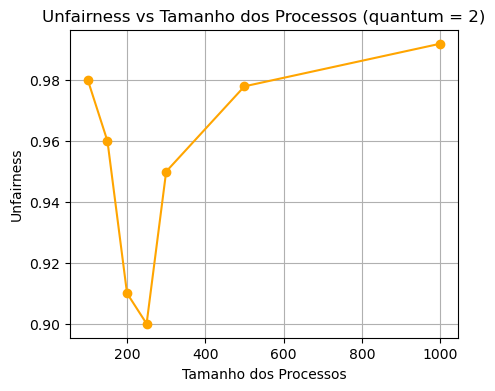

In [106]:
#resposta 3 Loteria

import matplotlib.pyplot as plt

# Tamanhos dos processos
tamanhos = [100, 150, 200, 250, 300, 500, 1000]

# Valores correspondentes de unfairness
unfairness = [0.98, 0.96, 0.91, 0.90, 0.95, 0.978, 0.992]

# Criando o gráfico
plt.figure(figsize=(5, 4))
plt.plot(tamanhos, unfairness, marker='o', linestyle='-', color='orange')

# Adicionando rótulos e título
plt.title('Unfairness vs Tamanho dos Processos (quantum = 2)')
plt.xlabel('Tamanho dos Processos')
plt.ylabel('Unfairness')
plt.grid(True)

plt.show()




#### Sobre Stride ####

1 - Repita o cenário da 2 de loteria e faça um novo gráfico.

2 - No simulador maior, qual o efeito que ter muitos processos fazendo E/S tem no algoritmo? O que pode ser feito com a posição do processo quando ele volta de E/S?

3 - No simulador maior, rode um cenário igual para stride e loteria (com a mesma semente aleatória) e calcule tempo de resposta, de execução e __tempo de espera__ (tempo que o processo passou pronto). O que mudou entre os dois?

#### Sobre MLFQ ####

1 - Rode o MLFQ no segundo simulador com duas filas e sem boost. O que aconteceu? 

2 - Quais configurações de parâmetros transformam o MLFQ no Round Robin?

3 - Rodando no primeiro simulador, faça 1 dos quatro processos ser 100\% CPU-Bound e os outros três 60\% I/O Bound. Use a configuração com 3 filas, com 5, 3 e 1 timeslices para as fila em ordem de priorida. De quanto tempo deve ser o Boost para que o processo CPU-Bound não sofra starvation e tenha CPU 1 vez a cada 20 timeslices?

4 - Teste diversas configurações de número de filas, quantum das filas e boost no simulador maior e ache a que leva ao melhor tempo de execução.